## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Profitability Based on Movie Release Month (tn.movie_budget.csv)

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
from datetime import datetime
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv')


In [115]:
movie_budgets_df.drop_duplicates

movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [116]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#Convert financial columns from strings to numerical data
#Calculate profitability (Total_gross - production budget)/production budget

In [117]:
financial_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in financial_columns:
    movie_budgets_df[col] = movie_budgets_df[col].replace('[\$,]', '', regex=True).astype(float)

# Calculate Total gross
movie_budgets_df['total_gross'] = movie_budgets_df['worldwide_gross'] + movie_budgets_df['domestic_gross']

# Calculate profitability as (total_gross - production_budget) / production_budget
movie_budgets_df['profitability_ratio'] = (movie_budgets_df['total_gross'] - movie_budgets_df['production_budget']) / movie_budgets_df['production_budget']


movie_budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profitability_ratio
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,7.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,2.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-0.449929
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,4.632244
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,5.110105


In [118]:
# Generate descriptive statistics for production_budget, domestic_gross, worldwide_gross, and profitability_ratio

financial_summary = movie_budgets_df[['production_budget', 'total_gross', 'profitability_ratio']].describe()
financial_summary


,production_budget,total_gross,profitability_ratio
count,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,1.333608e+08,6.783702
std,4.181208e+07,2.399411e+08,54.922090
min,1.100000e+03,0.000000e+00,-1.000000
25%,5.000000e+06,6.448924e+06,-0.202878
50%,1.700000e+07,4.605855e+07,1.659315
75%,4.000000e+07,1.506937e+08,4.893170
max,4.250000e+08,3.536853e+09,3599.000000


In [119]:
# Extract month  from release_date for seasonality analysis
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'], format="%b %d, %Y", errors='coerce')
movie_budgets_df['release_month'] = movie_budgets_df['release_date'].dt.month

In [120]:
movie_budgets_df['release_month'].unique()

array([12,  5,  6,  4, 11,  7,  3,  2, 10,  8,  9,  1], dtype=int64)

In [121]:
most_profit = movie_budgets_df.sort_values(by='total_gross', ascending=False)
most_profit[['movie', 'release_month', 'production_budget', 'total_gross', 'profitability_ratio']]

,movie,release_month,production_budget,total_gross,profitability_ratio
0,Avatar,12,425000000.0,3.536853e+09,7.322007
5,Star Wars Ep. VII: The Force Awakens,12,306000000.0,2.989973e+09,8.771155
42,Titanic,12,200000000.0,2.867572e+09,13.337862
6,Avengers: Infinity War,4,300000000.0,2.726950e+09,8.089832
33,Jurassic World,6,215000000.0,2.301125e+09,9.702909
...,...,...,...,...,...
4192,A Shine of Rainbows,3,6000000.0,0.000000e+00,-1.000000
4193,Freaky Deaky,12,6000000.0,0.000000e+00,-1.000000
4194,The Hit List,5,6000000.0,0.000000e+00,-1.000000
4856,Always Woodstock,11,2400000.0,0.000000e+00,-1.000000


In [122]:
# Calculate average domestic and worldwide gross, and profitability by month
monthly_seasonality = movie_budgets_df.groupby('release_month').agg(
    avg_total_gross=('total_gross', 'mean'),
    avg_profitability_ratio=('profitability_ratio', 'mean')
).sort_values(by='avg_profitability_ratio', ascending=False)

print("Monthly Seasonality:\n", monthly_seasonality)


Monthly Seasonality:
                avg_total_gross  avg_profitability_ratio
release_month                                          
6                 2.083509e+08                13.144836
7                 2.016917e+08                 8.465634
8                 9.314662e+07                 8.119027
5                 2.289660e+08                 7.217944
10                7.388806e+07                 7.132475
2                 1.069592e+08                 6.655746
1                 7.051344e+07                 6.134038
11                1.939228e+08                 5.997778
3                 1.192064e+08                 5.774310
9                 6.984357e+07                 5.096334
4                 8.724866e+07                 4.814233
12                1.477940e+08                 4.142139


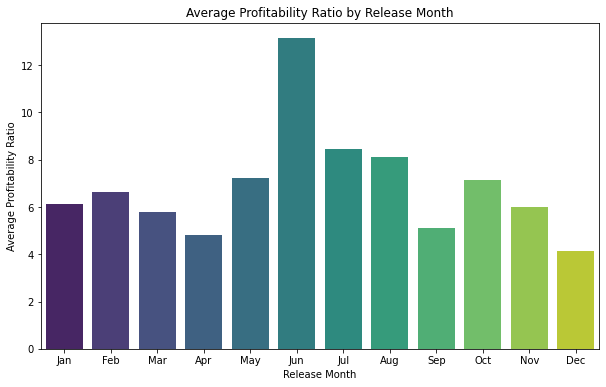

In [123]:
# Plotting profitability ratio across months
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_seasonality.index, y=monthly_seasonality['avg_profitability_ratio'], palette='viridis')

# Labeling the plot
plt.title("Average Profitability Ratio by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Profitability Ratio")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.show()


In [124]:
#Statistical Test: Hypothesis Testing (Anova)

#Null Hypothesis = Average profitability ratio is the same across all months
#Alternative Hypothesis = Average profitability ratio differs significantly by month

#Will use ANOVA to test this hypothesis